<a href="https://colab.research.google.com/github/adityasukhwani/DL_Lab/blob/master/AdityaSukhwani_Week4_200968262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 18 kB/s 
     |████████████████████████████████| 462 kB 4.7 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-19 16:57:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.128, 142.251.161.128, 74.125.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   250MB/s    in 0.3s    

2022-08-19 16:57:05 (250 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')



In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.493.jpg', 'cat.987.jpg', 'cat.747.jpg', 'cat.671.jpg', 'cat.961.jpg', 'cat.560.jpg', 'cat.347.jpg', 'cat.842.jpg', 'cat.17.jpg', 'cat.724.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


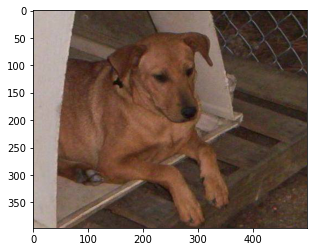

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_dogs_dir, train_dog_fnames[3])))

In [ ]:
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['acc'])

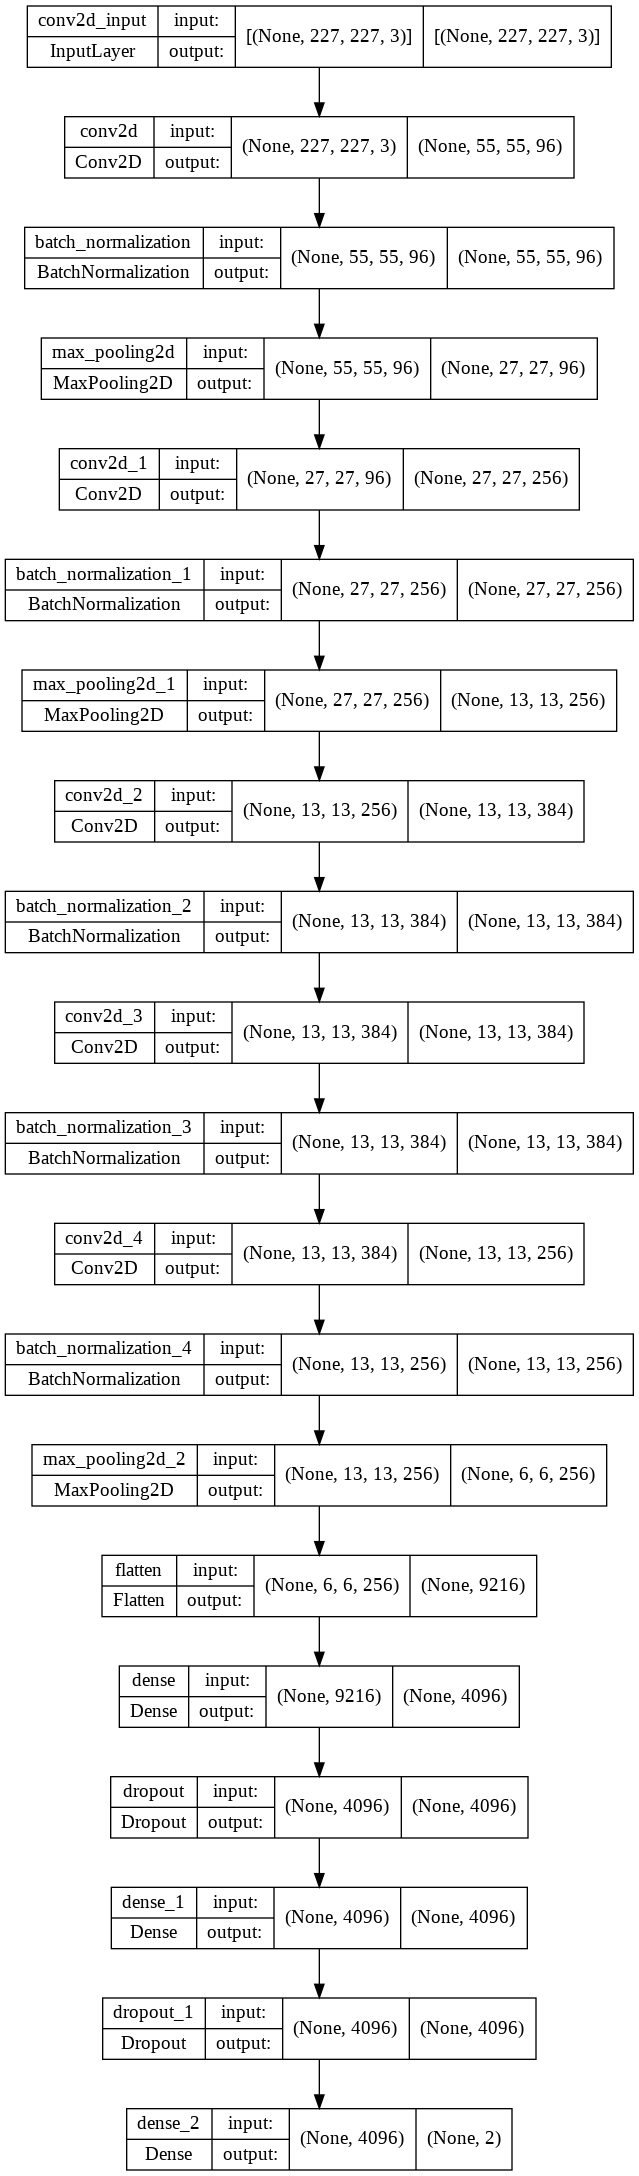

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 17s 118ms/step - loss: 2.4847 - acc: 0.5435 - val_loss: 1.4025 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 15s 148ms/step - loss: 1.7720 - acc: 0.5905 - val_loss: 2.2662 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 12s 124ms/step - loss: 1.3585 - acc: 0.6330 - val_loss: 2.2406 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 15s 148ms/step - loss: 1.0726 - acc: 0.6525 - val_loss: 2.2303 - val_acc: 0.5040
Epoch 5/10
100/100 [==============================] - 12s 117ms/step - loss: 0.8580 - acc: 0.6745 - val_loss: 1.0444 - val_acc: 0.5590
Epoch 6/10
100/100 [==============================] - 13s 127ms/step - loss: 0.8698 - acc: 0.6950 - val_loss: 0.8393 - val_acc: 0.6430
Epoch 7/10
100/100 [==============================] - 12s 122ms/step - loss: 0.6796 - acc: 0.7180 - val_loss: 0.6856 - val_acc: 0.6760
Epoch 8/10
100/100 [==============================] - 1

In [ ]:
#VGG 16
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(227,227,3), weights='imagenet', include_top=False)
base_model.trainable = False 
base_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                              

In [ ]:
modelvgg = tf.keras.Sequential([
       base_model,
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(2, activation='sigmoid')
    ])

In [ ]:
modelvgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
modelvgg.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

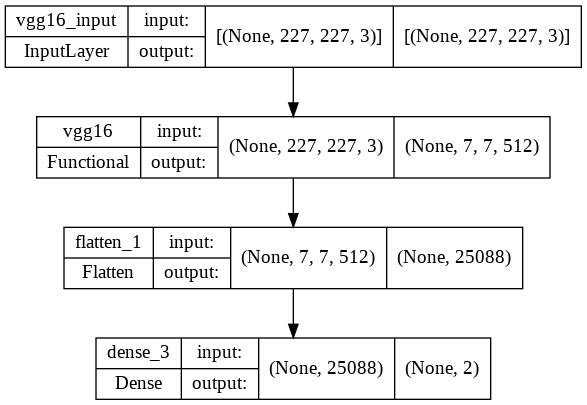

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(modelvgg,  show_shapes=True, show_layer_names=True)

In [ ]:
history = modelvgg.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 22s 196ms/step - loss: 0.5159 - acc: 0.7560 - val_loss: 0.3551 - val_acc: 0.8600
Epoch 2/10
100/100 [==============================] - 20s 199ms/step - loss: 0.2949 - acc: 0.8925 - val_loss: 0.2928 - val_acc: 0.8840
Epoch 3/10
100/100 [==============================] - 20s 204ms/step - loss: 0.2304 - acc: 0.9245 - val_loss: 0.2573 - val_acc: 0.9010
Epoch 4/10
100/100 [==============================] - 21s 210ms/step - loss: 0.1936 - acc: 0.9410 - val_loss: 0.2446 - val_acc: 0.9000
Epoch 5/10
100/100 [==============================] - 21s 215ms/step - loss: 0.1660 - acc: 0.9515 - val_loss: 0.2328 - val_acc: 0.9050
Epoch 6/10
100/100 [==============================] - 21s 214ms/step - loss: 0.1473 - acc: 0.9600 - val_loss: 0.2244 - val_acc: 0.9060
Epoch 7/10
100/100 [==============================] - 21s 212ms/step - loss: 0.1293 - acc: 0.9675 - val_loss: 0.2201 - val_acc: 0.9080
Epoch 8/10
100/100 [==============================] - 2

In [ ]:
#resNet50
from keras.applications.resnet import ResNet50
base_model_res = ResNet50(input_shape=(227,227,3), weights='imagenet', include_top=False)
base_model_res.trainable = False #freeze the layers
base_model_res.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
model_res = tf.keras.Sequential([
    base_model_res,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model_res.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

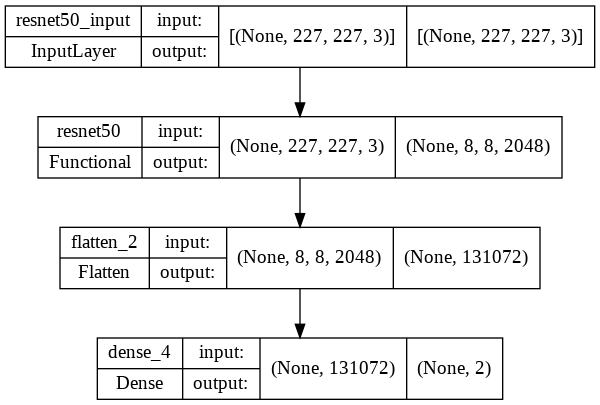

In [ ]:
plot_model(model_res,  show_shapes=True, show_layer_names=True)

In [ ]:
history = model_res.fit(
train_generator,
      steps_per_epoch=100,  
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 18s 144ms/step - loss: 0.7656 - acc: 0.5550 - val_loss: 0.7633 - val_acc: 0.5020
Epoch 2/10
100/100 [==============================] - 14s 135ms/step - loss: 0.6958 - acc: 0.5845 - val_loss: 1.3173 - val_acc: 0.5070
Epoch 3/10
100/100 [==============================] - 14s 135ms/step - loss: 0.6556 - acc: 0.6320 - val_loss: 0.7530 - val_acc: 0.5250
Epoch 4/10
100/100 [==============================] - 13s 135ms/step - loss: 0.6273 - acc: 0.6445 - val_loss: 0.6345 - val_acc: 0.6330
Epoch 5/10
100/100 [==============================] - 13s 135ms/step - loss: 0.6696 - acc: 0.6390 - val_loss: 0.9455 - val_acc: 0.5560
Epoch 6/10
100/100 [==============================] - 13s 135ms/step - loss: 0.6410 - acc: 0.6495 - val_loss: 1.1128 - val_acc: 0.5270
Epoch 7/10
100/100 [==============================] - 14s 136ms/step - loss: 0.7201 - acc: 0.6240 - val_loss: 0.6057 - val_acc: 0.6710
Epoch 8/10
100/100 [==============================] - 1

16719872/16705208 [==============================] - 0s 0us/step


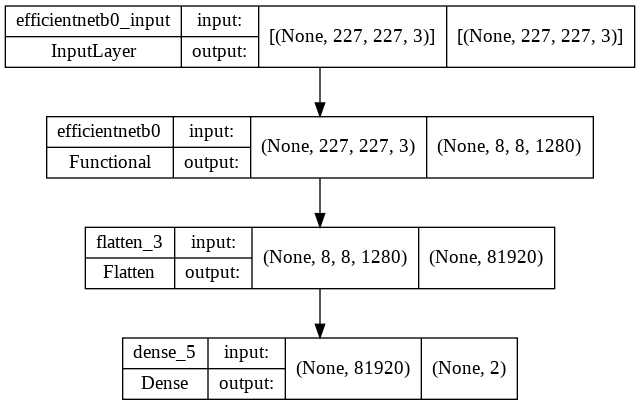

In [ ]:
#efficientnetB0
from keras.applications.efficientnet import EfficientNetB0
base_model_eff = EfficientNetB0(input_shape=(227,227,3), weights='imagenet', include_top=False)
base_model_eff.trainable = False #freeze the layers


model_eff = tf.keras.Sequential([
    base_model_eff,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])


model_eff.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

plot_model(model_eff,  show_shapes=True, show_layer_names=True)


In [ ]:
history = model_eff.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 14s 139ms/step - loss: 0.7832 - acc: 0.4830 - val_loss: 0.7133 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 13s 130ms/step - loss: 0.7349 - acc: 0.5020 - val_loss: 0.8007 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 12s 125ms/step - loss: 0.8591 - acc: 0.5085 - val_loss: 0.6970 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 16s 159ms/step - loss: 0.7446 - acc: 0.5045 - val_loss: 0.6940 - val_acc: 0.5020
Epoch 5/10
100/100 [==============================] - 14s 142ms/step - loss: 0.7404 - acc: 0.5210 - val_loss: 0.7463 - val_acc: 0.5000
Epoch 6/10
100/100 [==============================] - 12s 122ms/step - loss: 0.8015 - acc: 0.4860 - val_loss: 0.7271 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 12s 120ms/step - loss: 0.7395 - acc: 0.5100 - val_loss: 0.6885 - val_acc: 0.5590
Epoch 8/10
100/100 [==============================] - 1

9420800/9406464 [==============================] - 0s 0us/step


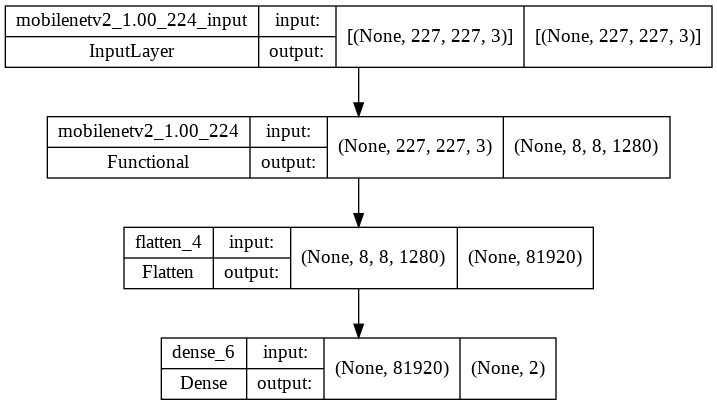

In [ ]:
#mobilenetv2
from keras.applications.mobilenet_v2 import MobileNetV2
base_model_mobile = MobileNetV2(input_shape=(227,227,3), weights='imagenet', include_top=False)
base_model_mobile.trainable = False #freeze the layers


model_mobile = tf.keras.Sequential([
    base_model_mobile,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])


model_mobile.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

plot_model(model_mobile,  show_shapes=True, show_layer_names=True)

In [ ]:
history = model_mobile.fit(
train_generator,
      steps_per_epoch=100,  
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 11s 109ms/step - loss: 0.3031 - acc: 0.9465 - val_loss: 0.1934 - val_acc: 0.9710
Epoch 2/10
100/100 [==============================] - 11s 110ms/step - loss: 0.0225 - acc: 0.9935 - val_loss: 0.1360 - val_acc: 0.9810
Epoch 3/10
100/100 [==============================] - 11s 110ms/step - loss: 0.0023 - acc: 0.9990 - val_loss: 0.0885 - val_acc: 0.9880
Epoch 4/10
100/100 [==============================] - 11s 109ms/step - loss: 1.0127e-04 - acc: 1.0000 - val_loss: 0.0883 - val_acc: 0.9880
Epoch 5/10
100/100 [==============================] - 11s 108ms/step - loss: 4.3886e-05 - acc: 1.0000 - val_loss: 0.0883 - val_acc: 0.9880
Epoch 6/10
100/100 [==============================] - 11s 109ms/step - loss: 3.2987e-05 - acc: 1.0000 - val_loss: 0.0884 - val_acc: 0.9880
Epoch 7/10
100/100 [==============================] - 11s 109ms/step - loss: 2.7392e-05 - acc: 1.0000 - val_loss: 0.0884 - val_acc: 0.9880
Epoch 8/10
100/100 [===================

87924736/87910968 [==============================] - 0s 0us/step


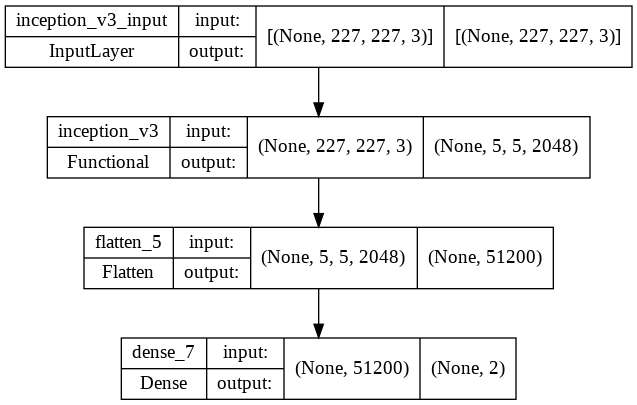

In [ ]:
#googleNet
from keras.applications.inception_v3 import InceptionV3
base_model_google = InceptionV3(input_shape=(227,227,3), weights='imagenet', include_top=False)
base_model_google.trainable = False #freeze the layers


model_google = tf.keras.Sequential([
    base_model_google,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])


model_google.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

plot_model(model_google,  show_shapes=True, show_layer_names=True)

In [ ]:
history = model_google.fit(
train_generator,
      steps_per_epoch=100,  
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 19s 129ms/step - loss: 0.1059 - acc: 0.9670 - val_loss: 0.0840 - val_acc: 0.9690
Epoch 2/10
100/100 [==============================] - 12s 117ms/step - loss: 0.0135 - acc: 0.9970 - val_loss: 0.0533 - val_acc: 0.9800
Epoch 3/10
100/100 [==============================] - 12s 116ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0441 - val_acc: 0.9880
Epoch 4/10
100/100 [==============================] - 12s 117ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0433 - val_acc: 0.9860
Epoch 5/10
100/100 [==============================] - 12s 120ms/step - loss: 6.7823e-04 - acc: 1.0000 - val_loss: 0.0425 - val_acc: 0.9880
Epoch 6/10
100/100 [==============================] - 12s 117ms/step - loss: 5.3060e-04 - acc: 1.0000 - val_loss: 0.0421 - val_acc: 0.9870
Epoch 7/10
100/100 [==============================] - 12s 117ms/step - loss: 4.3913e-04 - acc: 1.0000 - val_loss: 0.0419 - val_acc: 0.9870
Epoch 8/10
100/100 [=======================

Horse2Zebra Dataset 

In [ ]:
!wget https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip \
  -O /tmp/horse2zebra.zip

/tmp/horse2zebra.zip: Is a directory


In [ ]:
import os
import zipfile
local_zip = '/tmp/horse2zebra.zip/horse2zebra.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
base_dir = '/tmp/horse2zebra'
!mkdir /tmp/horse2zebra/train
!mkdir /tmp/horse2zebra/test
!mv /tmp/horse2zebra/trainA /tmp/horse2zebra/train
!mv /tmp/horse2zebra/trainB /tmp/horse2zebra/train
!mv /tmp/horse2zebra/testA /tmp/horse2zebra/test
!mv /tmp/horse2zebra/testB /tmp/horse2zebra/test

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_horse_dir = os.path.join(train_dir, 'trainA')

# Directory with our training dog pictures
train_zebra_dir = os.path.join(train_dir, 'trainB')

# Directory with our validation cat pictures
validation_horse_dir = os.path.join(validation_dir, 'testA')

# Directory with our validation dog pictures
validation_zebradir = os.path.join(validation_dir, 'testB')

In [ ]:
train_generator_h2z = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 227x227
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [ ]:
validation_generator_h2z = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator_h2z,
    epochs=10,
    validation_data=validation_generator_h2z)

Epoch 1/10
121/121 [==============================] - 11s 90ms/step - loss: 0.1607 - acc: 0.9371 - val_loss: 1.4780 - val_acc: 0.5000
Epoch 2/10
121/121 [==============================] - 11s 91ms/step - loss: 0.1408 - acc: 0.9534 - val_loss: 1.9193 - val_acc: 0.5040
Epoch 3/10
121/121 [==============================] - 11s 90ms/step - loss: 0.1364 - acc: 0.9429 - val_loss: 1.7990 - val_acc: 0.5120
Epoch 4/10
121/121 [==============================] - 11s 90ms/step - loss: 0.1164 - acc: 0.9529 - val_loss: 1.9848 - val_acc: 0.4740
Epoch 5/10
121/121 [==============================] - 11s 92ms/step - loss: 0.1132 - acc: 0.9613 - val_loss: 2.7238 - val_acc: 0.4950
Epoch 6/10
121/121 [==============================] - 11s 91ms/step - loss: 0.2256 - acc: 0.9313 - val_loss: 4.5251 - val_acc: 0.5270
Epoch 7/10
121/121 [==============================] - 11s 90ms/step - loss: 0.2344 - acc: 0.9184 - val_loss: 1.2796 - val_acc: 0.4910
Epoch 8/10
121/121 [==============================] - 11s 89ms

In [ ]:
history = modelvgg.fit(
train_generator_h2z,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=3,
      validation_data=validation_generator_h2z
      )

Epoch 1/3
100/100 [==============================] - 14s 142ms/step - loss: 0.0858 - acc: 0.9727
Epoch 2/3
100/100 [==============================] - 14s 142ms/step - loss: 0.0753 - acc: 0.9808
Epoch 3/3
100/100 [==============================] - 14s 141ms/step - loss: 0.0657 - acc: 0.9818


In [ ]:
history = model_res.fit(
train_generator_h2z,
      steps_per_epoch=100,  
      epochs=10,
      validation_data=validation_generator_h2z)

Epoch 1/10
100/100 [==============================] - 10s 101ms/step - loss: 0.7900 - acc: 0.6159 - val_loss: 0.5071 - val_acc: 0.7154
Epoch 2/10
100/100 [==============================] - 10s 97ms/step - loss: 0.5802 - acc: 0.7032 - val_loss: 0.4957 - val_acc: 0.7577
Epoch 3/10
100/100 [==============================] - 10s 98ms/step - loss: 0.4859 - acc: 0.7592 - val_loss: 0.4403 - val_acc: 0.7654
Epoch 4/10
100/100 [==============================] - 12s 119ms/step - loss: 0.4605 - acc: 0.7805 - val_loss: 0.4027 - val_acc: 0.8231
Epoch 5/10
100/100 [==============================] - 10s 100ms/step - loss: 0.4202 - acc: 0.7980 - val_loss: 0.4066 - val_acc: 0.8231
Epoch 6/10
100/100 [==============================] - 11s 112ms/step - loss: 0.4297 - acc: 0.7905 - val_loss: 0.6664 - val_acc: 0.7115
Epoch 7/10
100/100 [==============================] - 12s 121ms/step - loss: 0.3915 - acc: 0.8127 - val_loss: 0.4220 - val_acc: 0.7538
Epoch 8/10
100/100 [==============================] - 11s

In [ ]:
history = model_eff.fit(
train_generator_h2z,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator_h2z)

Epoch 1/10
100/100 [==============================] - 8s 78ms/step - loss: 0.8663 - acc: 0.5321 - val_loss: 0.7144 - val_acc: 0.5385
Epoch 2/10
100/100 [==============================] - 7s 74ms/step - loss: 0.7297 - acc: 0.5570 - val_loss: 0.6579 - val_acc: 0.5885
Epoch 3/10
100/100 [==============================] - 8s 79ms/step - loss: 0.7713 - acc: 0.5462 - val_loss: 0.6334 - val_acc: 0.5385
Epoch 4/10
100/100 [==============================] - 8s 76ms/step - loss: 0.6831 - acc: 0.5820 - val_loss: 0.6289 - val_acc: 0.5423
Epoch 5/10
100/100 [==============================] - 7s 74ms/step - loss: 0.6674 - acc: 0.6050 - val_loss: 0.9381 - val_acc: 0.5385
Epoch 6/10
100/100 [==============================] - 7s 73ms/step - loss: 0.6874 - acc: 0.6032 - val_loss: 0.6220 - val_acc: 0.6731
Epoch 7/10
100/100 [==============================] - 8s 75ms/step - loss: 0.7158 - acc: 0.5770 - val_loss: 0.6207 - val_acc: 0.5385
Epoch 8/10
100/100 [==============================] - 7s 73ms/step - 

In [ ]:
history = model_mobile.fit(
train_generator_h2z,
      steps_per_epoch=100,  
      epochs=10,
      validation_data=validation_generator_h2z)

Epoch 1/10
100/100 [==============================] - 10s 76ms/step - loss: 0.0822 - acc: 0.9730 - val_loss: 0.0588 - val_acc: 0.9808
Epoch 2/10
100/100 [==============================] - 7s 69ms/step - loss: 0.0131 - acc: 0.9965 - val_loss: 0.0855 - val_acc: 0.9885
Epoch 3/10
100/100 [==============================] - 7s 68ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0913 - val_acc: 0.9846
Epoch 4/10
100/100 [==============================] - 7s 69ms/step - loss: 2.8824e-04 - acc: 1.0000 - val_loss: 0.0923 - val_acc: 0.9846
Epoch 5/10
100/100 [==============================] - 8s 77ms/step - loss: 1.9078e-04 - acc: 1.0000 - val_loss: 0.0972 - val_acc: 0.9846
Epoch 6/10
100/100 [==============================] - 7s 69ms/step - loss: 1.4204e-04 - acc: 1.0000 - val_loss: 0.0951 - val_acc: 0.9846
Epoch 7/10
100/100 [==============================] - 7s 70ms/step - loss: 1.0321e-04 - acc: 1.0000 - val_loss: 0.0973 - val_acc: 0.9846
Epoch 8/10
100/100 [==============================] 

In [ ]:
history = model_google.fit(
train_generator_h2z,
      steps_per_epoch=100,  
      epochs=10,
      validation_data=validation_generator_h2z)

Epoch 1/10
100/100 [==============================] - 8s 81ms/step - loss: 0.1503 - acc: 0.9692 - val_loss: 0.1666 - val_acc: 0.9808
Epoch 2/10
100/100 [==============================] - 8s 75ms/step - loss: 0.0262 - acc: 0.9929 - val_loss: 0.1221 - val_acc: 0.9692
Epoch 3/10
100/100 [==============================] - 8s 75ms/step - loss: 0.0035 - acc: 0.9985 - val_loss: 0.1518 - val_acc: 0.9769
Epoch 4/10
100/100 [==============================] - 8s 75ms/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.1446 - val_acc: 0.9731
Epoch 5/10
100/100 [==============================] - 7s 74ms/step - loss: 5.9126e-04 - acc: 1.0000 - val_loss: 0.1725 - val_acc: 0.9808
Epoch 6/10
100/100 [==============================] - 7s 74ms/step - loss: 7.3508e-05 - acc: 1.0000 - val_loss: 0.1653 - val_acc: 0.9769
Epoch 7/10
100/100 [==============================] - 8s 74ms/step - loss: 5.5842e-05 - acc: 1.0000 - val_loss: 0.1640 - val_acc: 0.9769
Epoch 8/10
100/100 [==============================] - 8s 